# Exploratory Data Analysis
This notebook is used to analyze the tabular and image data of the ADNI-Dataset

TODO:
[] Visualize data without duplicates
[] Track change in diagnosis in individual subject (i.e how many patients progressed from CN to MCI to AD
[] Discuss plots
[] Create ProfileReport

In [2]:
#!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from pandas_profiling import ProfileReport

import os
import sys
sys.path.insert(0, '../../scripts/')

from helpers import miscellaneous as misc
from helpers import plotters
CONFIG = misc.get_config()

In [3]:
os.getcwd()

'D:\\FHNW\\Challenges\\fhnw_ds_fs22_cdl1_cml1_Brain_Health_Challenge\\notebooks\\0_eda'

In [4]:
data = pd.read_csv('../../data/raw/data/images/ADNI1_Complete_1Yr_1.5T_1_20_2022.csv')
data.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,NaN
1,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,6/01/2008,NiFTI,NaN
2,I97341,941_S_1311,MCI,M,70,3,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/27/2007,NiFTI,NaN
3,I63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,NaN
4,I75150,941_S_1202,CN,M,78,3,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,8/24/2007,NiFTI,NaN


In [5]:
# profiling_file_name = "adni_profiling_report.html"
#
# if os.path.isfile(profiling_file_name):
#     with open(profiling_file_name) as f:
#         profile = f.readlines()
# else:
#     profile = ProfileReport(data, title='ADNI Image Data', explorative=False)
#     profile.to_file(profiling_file_name)
#
# # profile.to_notebook_iframe()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Data ID  2294 non-null   object 
 1   Subject        2294 non-null   object 
 2   Group          2294 non-null   object 
 3   Sex            2294 non-null   object 
 4   Age            2294 non-null   int64  
 5   Visit          2294 non-null   int64  
 6   Modality       2294 non-null   object 
 7   Description    2294 non-null   object 
 8   Type           2294 non-null   object 
 9   Acq Date       2294 non-null   object 
 10  Format         2294 non-null   object 
 11  Downloaded     0 non-null      float64
dtypes: float64(1), int64(2), object(9)
memory usage: 215.2+ KB


In [50]:
data['Image Data ID'].duplicated().sum()

0

In [21]:
data['Acq Date'] = pd.to_datetime(data['Acq Date'])

In [23]:
data.head(2)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2007-03-02,NiFTI,NaN
1,I112538,941_S_1311,MCI,M,70,4,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2008-06-01,NiFTI,NaN


In [7]:
data.describe()

,Age,Visit,Downloaded
count,2294.000000,2294.000000,0.0
mean,75.638622,2.589364,NaN
std,6.662227,1.271510,NaN
min,55.000000,1.000000,NaN
25%,72.000000,1.000000,NaN
50%,76.000000,3.000000,NaN
75%,80.000000,4.000000,NaN
max,91.000000,11.000000,NaN


# Univarate Analysis

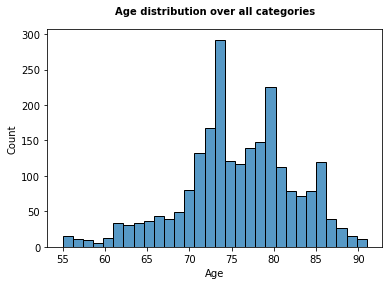

In [8]:
g = sns.histplot(data, x='Age', palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', '', 'Age', 'Count')

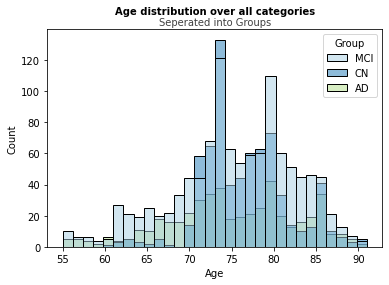

In [9]:
g = sns.histplot(data, x='Age', hue="Group", palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', 'Seperated into Groups', 'Age', 'Count')

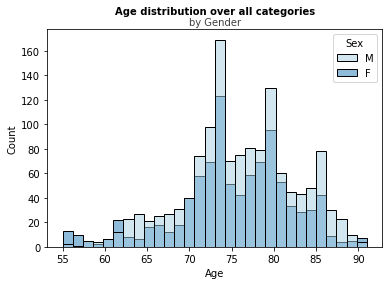

In [10]:
g = sns.histplot(data, x='Age', hue="Sex", palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Age distribution over all categories', 'by Gender', 'Age', 'Count')

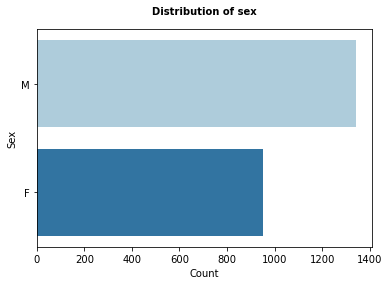

In [20]:
g = sns.countplot(y=data.Sex, palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Distribution of sex', '', 'Count','Sex')

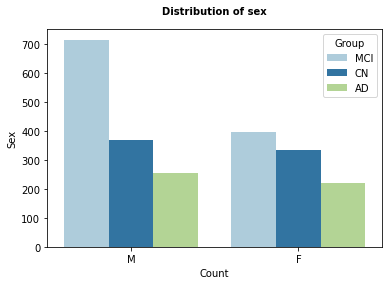

In [27]:
g = sns.countplot(data=data, x='Sex', hue='Group', palette=CONFIG['COLOR_DISCRETE'])
plotters.plot_wrapper(g, 'Distribution of sex', '', 'Count','Sex')

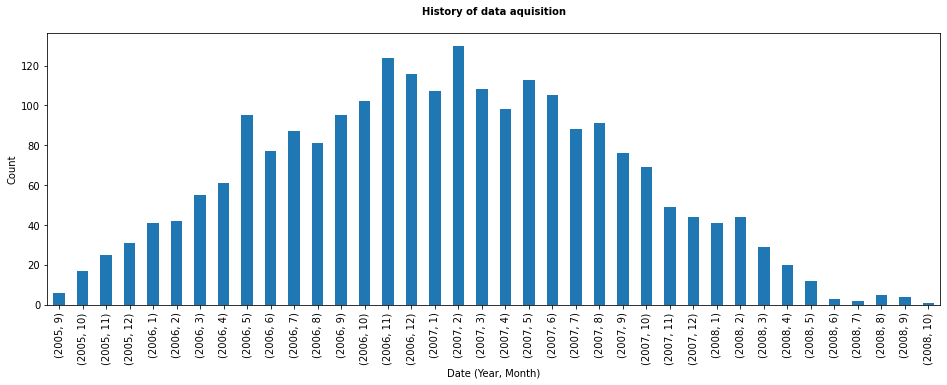

In [43]:
plt.figure(figsize=(16,5))
g = data.groupby([data["Acq Date"].dt.year, data["Acq Date"].dt.month]).Subject.count().plot(kind="bar")
plotters.plot_wrapper(g, 'History of data aquisition', '', 'Date (Year, Month)','Count')